In [1]:
from IPython.display import Image
from sklearn.preprocessing import Imputer
from sklearn import tree
import pandas as pd
from subprocess import check_call
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

In [2]:
d_train = pd.read_excel('siswa.xlsx')
d_train[['No','No_Induk','Nama','jen_kel','alamat','Agama','Tgl_Lahir','Tmpt_Lahir','Nama_Wali','Pekerjaan Wali','Pend','Alamat_Wali','Thn_msk','Usia_msk','lulus','UAS','predikat','Pend_SebelumSD']].reset_index(drop=True)
d_train

,No,No_Induk,Nama,jen_kel,alamat,Agama,Tgl_Lahir,Tmpt_Lahir,Nama_Wali,Pekerjaan Wali,Pend,Alamat_Wali,Thn_msk,Usia_msk,lulus,UAS,predikat,Pend_SebelumSD
0,1,2683,Ani Yuanita,P,Tegallayang,Islam,1993-11-03,Bantul,Sukarjo,Petani,SD,Tegallayang,2000,7,2007,17.90,Cukup,TK
1,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,1993-12-29,Bantul,Hadi Wardoyo,Petani,SMA,Tegallayang,2000,7,2007,16.90,Cukup,TK
2,3,2688,Heri Budiyanto,L,Tegallayang,Islam,1994-02-15,Bantul,Ribut,Petani,NaN,Tegallayang,2000,6,2007,20.15,Cukup,TK
3,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,1994-04-20,Bantul,FX Slamet Sudarsono,PNS,PT,Tegallayang,2001,7,2007,18.35,Cukup,TK
4,5,2701,Nur Hidayat,L,Tegallayang,Islam,1994-06-12,Kuningan,Ofan,Wiraswasta,SLTP,Tegallayang,2001,7,2007,26.10,Baik,TK
5,6,2702,Vilda Lestari,P,Tegallayang,Islam,1994-06-25,Bantul,Rochmadi,Petani,SLTP,Tegallayang,2001,7,2007,13.60,Kurang,TK
6,7,2703,Edi Suryanto,L,Tegallayang,Islam,1994-07-06,Bantul,Sukiman,Petani,SD,Tegallayang,2001,7,2007,22.65,Baik,TK
7,8,2705,Erna Dwi Puspita,P,Tegallayang,Islam,1994-09-12,Bantul,Sumarjo,Wiraswasta,SD,Tegallayang,2001,7,2007,18.05,Cukup,TK
8,9,2706,Nurfita FF,P,Daguran,Islam,1994-10-04,Bantul,Giyana,Wiraswasta,SD,Tegallayang,2001,7,2007,16.15,Cukup,TK
9,10,2707,Fahmi dwi N.,L,Tegallayang,Islam,1994-10-05,Bantul,Syamsudin,Petani,SD,Tegallayang,2001,7,2007,26.90,Baik,TK


In [8]:
#membuat atribut tahun lahir
for index, row in d_train.iterrows():
    d_train.loc[index, 'tahun_lahir'] = int(row['Tgl_Lahir'].year)
d_train.head()

,No,No_Induk,Nama,jen_kel,alamat,Agama,Tgl_Lahir,Tmpt_Lahir,Nama_Wali,Pekerjaan Wali,Pend,Alamat_Wali,Thn_msk,Usia_msk,lulus,UAS,predikat,Pend_SebelumSD,Masa Studi,tahun_lahir
0,1,2683,Ani Yuanita,P,Tegallayang,Islam,1993-11-03,Bantul,Sukarjo,Petani,SD,Tegallayang,2000,7,2007,17.90,Cukup,TK,7.0,1993.0
1,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,1993-12-29,Bantul,Hadi Wardoyo,Petani,SMA,Tegallayang,2000,7,2007,16.90,Cukup,TK,7.0,1993.0
2,3,2688,Heri Budiyanto,L,Tegallayang,Islam,1994-02-15,Bantul,Ribut,Petani,NaN,Tegallayang,2000,6,2007,20.15,Cukup,TK,7.0,1994.0
3,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,1994-04-20,Bantul,FX Slamet Sudarsono,PNS,PT,Tegallayang,2001,7,2007,18.35,Cukup,TK,6.0,1994.0
4,5,2701,Nur Hidayat,L,Tegallayang,Islam,1994-06-12,Kuningan,Ofan,Wiraswasta,SLTP,Tegallayang,2001,7,2007,26.10,Baik,TK,6.0,1994.0


In [9]:
from datetime import datetime
now = datetime.now()
now.year
for index, row in d_train.iterrows():
    d_train.ix[index, 'Masa Studi'] = row['lulus'] - row['Thn_msk']
d_train

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


,No,No_Induk,Nama,jen_kel,alamat,Agama,Tgl_Lahir,Tmpt_Lahir,Nama_Wali,Pekerjaan Wali,Pend,Alamat_Wali,Thn_msk,Usia_msk,lulus,UAS,predikat,Pend_SebelumSD,Masa Studi,tahun_lahir
0,1,2683,Ani Yuanita,P,Tegallayang,Islam,1993-11-03,Bantul,Sukarjo,Petani,SD,Tegallayang,2000,7,2007,17.90,Cukup,TK,7.0,1993.0
1,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,1993-12-29,Bantul,Hadi Wardoyo,Petani,SMA,Tegallayang,2000,7,2007,16.90,Cukup,TK,7.0,1993.0
2,3,2688,Heri Budiyanto,L,Tegallayang,Islam,1994-02-15,Bantul,Ribut,Petani,NaN,Tegallayang,2000,6,2007,20.15,Cukup,TK,7.0,1994.0
3,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,1994-04-20,Bantul,FX Slamet Sudarsono,PNS,PT,Tegallayang,2001,7,2007,18.35,Cukup,TK,6.0,1994.0
4,5,2701,Nur Hidayat,L,Tegallayang,Islam,1994-06-12,Kuningan,Ofan,Wiraswasta,SLTP,Tegallayang,2001,7,2007,26.10,Baik,TK,6.0,1994.0
5,6,2702,Vilda Lestari,P,Tegallayang,Islam,1994-06-25,Bantul,Rochmadi,Petani,SLTP,Tegallayang,2001,7,2007,13.60,Kurang,TK,6.0,1994.0
6,7,2703,Edi Suryanto,L,Tegallayang,Islam,1994-07-06,Bantul,Sukiman,Petani,SD,Tegallayang,2001,7,2007,22.65,Baik,TK,6.0,1994.0
7,8,2705,Erna Dwi Puspita,P,Tegallayang,Islam,1994-09-12,Bantul,Sumarjo,Wiraswasta,SD,Tegallayang,2001,7,2007,18.05,Cukup,TK,6.0,1994.0
8,9,2706,Nurfita FF,P,Daguran,Islam,1994-10-04,Bantul,Giyana,Wiraswasta,SD,Tegallayang,2001,7,2007,16.15,Cukup,TK,6.0,1994.0
9,10,2707,Fahmi dwi N.,L,Tegallayang,Islam,1994-10-05,Bantul,Syamsudin,Petani,SD,Tegallayang,2001,7,2007,26.90,Baik,TK,6.0,1994.0


In [10]:
from datetime import datetime
now = datetime.now()
now.year
for index, row in d_train.iterrows():
    d_train.loc[index, 'umur']= now.year - int (row['tahun_lahir'])
d_train.head()

,No,No_Induk,Nama,jen_kel,alamat,Agama,Tgl_Lahir,Tmpt_Lahir,Nama_Wali,Pekerjaan Wali,...,Alamat_Wali,Thn_msk,Usia_msk,lulus,UAS,predikat,Pend_SebelumSD,Masa Studi,tahun_lahir,umur
0,1,2683,Ani Yuanita,P,Tegallayang,Islam,1993-11-03,Bantul,Sukarjo,Petani,...,Tegallayang,2000,7,2007,17.90,Cukup,TK,7.0,1993.0,27.0
1,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,1993-12-29,Bantul,Hadi Wardoyo,Petani,...,Tegallayang,2000,7,2007,16.90,Cukup,TK,7.0,1993.0,27.0
2,3,2688,Heri Budiyanto,L,Tegallayang,Islam,1994-02-15,Bantul,Ribut,Petani,...,Tegallayang,2000,6,2007,20.15,Cukup,TK,7.0,1994.0,26.0
3,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,1994-04-20,Bantul,FX Slamet Sudarsono,PNS,...,Tegallayang,2001,7,2007,18.35,Cukup,TK,6.0,1994.0,26.0
4,5,2701,Nur Hidayat,L,Tegallayang,Islam,1994-06-12,Kuningan,Ofan,Wiraswasta,...,Tegallayang,2001,7,2007,26.10,Baik,TK,6.0,1994.0,26.0


In [16]:
#data training yg akan digunakan
d_trainn= d_train[['No_Induk','jen_kel','UAS','umur','Masa Studi']].reset_index(drop=True)
d_trainn

,No_Induk,jen_kel,UAS,umur,Masa Studi
0,2683,P,17.90,27.0,7.0
1,2686,L,16.90,27.0,7.0
2,2688,L,20.15,26.0,7.0
3,2700,L,18.35,26.0,6.0
4,2701,L,26.10,26.0,6.0
5,2702,P,13.60,26.0,6.0
6,2703,L,22.65,26.0,6.0
7,2705,P,18.05,26.0,6.0
8,2706,P,16.15,26.0,6.0
9,2707,L,26.90,26.0,6.0


In [18]:
#transformasi dari masa studi untuk menentukan lama studi
for index, row in d_train.iterrows():
    if row['Masa Studi'] >=8:
        d_train.loc[index, 'LamaStudi'] = 'lama'
    elif row['Masa Studi'] >=7:
        d_train.loc[index, 'LamaStudi'] = 'sedang'
    else:
        d_train.loc[index, 'LamaStudi'] = 'cepat'
        
d_train

,No,No_Induk,Nama,jen_kel,alamat,Agama,Tgl_Lahir,Tmpt_Lahir,Nama_Wali,Pekerjaan Wali,...,Thn_msk,Usia_msk,lulus,UAS,predikat,Pend_SebelumSD,Masa Studi,tahun_lahir,umur,LamaStudi
0,1,2683,Ani Yuanita,P,Tegallayang,Islam,1993-11-03,Bantul,Sukarjo,Petani,...,2000,7,2007,17.90,Cukup,TK,7.0,1993.0,27.0,sedang
1,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,1993-12-29,Bantul,Hadi Wardoyo,Petani,...,2000,7,2007,16.90,Cukup,TK,7.0,1993.0,27.0,sedang
2,3,2688,Heri Budiyanto,L,Tegallayang,Islam,1994-02-15,Bantul,Ribut,Petani,...,2000,6,2007,20.15,Cukup,TK,7.0,1994.0,26.0,sedang
3,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,1994-04-20,Bantul,FX Slamet Sudarsono,PNS,...,2001,7,2007,18.35,Cukup,TK,6.0,1994.0,26.0,cepat
4,5,2701,Nur Hidayat,L,Tegallayang,Islam,1994-06-12,Kuningan,Ofan,Wiraswasta,...,2001,7,2007,26.10,Baik,TK,6.0,1994.0,26.0,cepat
5,6,2702,Vilda Lestari,P,Tegallayang,Islam,1994-06-25,Bantul,Rochmadi,Petani,...,2001,7,2007,13.60,Kurang,TK,6.0,1994.0,26.0,cepat
6,7,2703,Edi Suryanto,L,Tegallayang,Islam,1994-07-06,Bantul,Sukiman,Petani,...,2001,7,2007,22.65,Baik,TK,6.0,1994.0,26.0,cepat
7,8,2705,Erna Dwi Puspita,P,Tegallayang,Islam,1994-09-12,Bantul,Sumarjo,Wiraswasta,...,2001,7,2007,18.05,Cukup,TK,6.0,1994.0,26.0,cepat
8,9,2706,Nurfita FF,P,Daguran,Islam,1994-10-04,Bantul,Giyana,Wiraswasta,...,2001,7,2007,16.15,Cukup,TK,6.0,1994.0,26.0,cepat
9,10,2707,Fahmi dwi N.,L,Tegallayang,Islam,1994-10-05,Bantul,Syamsudin,Petani,...,2001,7,2007,26.90,Baik,TK,6.0,1994.0,26.0,cepat


In [19]:
y = d_train['LamaStudi'].values
y

array(['sedang', 'sedang', 'sedang', 'cepat', 'cepat', 'cepat', 'cepat',
       'cepat', 'cepat', 'cepat', 'cepat', 'cepat', 'cepat', 'cepat',
       'cepat', 'cepat', 'cepat', 'cepat', 'cepat', 'cepat', 'cepat',
       'cepat', 'cepat', 'lama', 'sedang', 'sedang', 'sedang', 'cepat',
       'cepat'], dtype=object)

In [21]:
columns = ['UAS','umur','Masa Studi']
features = d_train[list(columns)].values
features

array([[17.9 , 27.  ,  7.  ],
       [16.9 , 27.  ,  7.  ],
       [20.15, 26.  ,  7.  ],
       [18.35, 26.  ,  6.  ],
       [26.1 , 26.  ,  6.  ],
       [13.6 , 26.  ,  6.  ],
       [22.65, 26.  ,  6.  ],
       [18.05, 26.  ,  6.  ],
       [16.15, 26.  ,  6.  ],
       [26.9 , 26.  ,  6.  ],
       [20.95, 26.  ,  6.  ],
       [25.25, 26.  ,  6.  ],
       [25.45, 26.  ,  6.  ],
       [28.85, 26.  ,  6.  ],
       [25.4 , 25.  ,  6.  ],
       [25.1 , 25.  ,  6.  ],
       [24.2 , 25.  ,  6.  ],
       [26.6 , 25.  ,  6.  ],
       [27.15, 25.  ,  6.  ],
       [26.5 , 25.  ,  6.  ],
       [24.6 , 25.  ,  6.  ],
       [20.5 , 25.  ,  6.  ],
       [18.45, 25.  ,  6.  ],
       [18.3 , 27.  ,  8.  ],
       [16.45, 26.  ,  7.  ],
       [23.2 , 25.  ,  7.  ],
       [18.75, 25.  ,  7.  ],
       [23.1 , 25.  ,  6.  ],
       [21.85, 25.  ,  6.  ]])

In [23]:
imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0)
x = imp.fit_transform(features)
x

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[17.9 , 27.  ,  7.  ],
       [16.9 , 27.  ,  7.  ],
       [20.15, 26.  ,  7.  ],
       [18.35, 26.  ,  6.  ],
       [26.1 , 26.  ,  6.  ],
       [13.6 , 26.  ,  6.  ],
       [22.65, 26.  ,  6.  ],
       [18.05, 26.  ,  6.  ],
       [16.15, 26.  ,  6.  ],
       [26.9 , 26.  ,  6.  ],
       [20.95, 26.  ,  6.  ],
       [25.25, 26.  ,  6.  ],
       [25.45, 26.  ,  6.  ],
       [28.85, 26.  ,  6.  ],
       [25.4 , 25.  ,  6.  ],
       [25.1 , 25.  ,  6.  ],
       [24.2 , 25.  ,  6.  ],
       [26.6 , 25.  ,  6.  ],
       [27.15, 25.  ,  6.  ],
       [26.5 , 25.  ,  6.  ],
       [24.6 , 25.  ,  6.  ],
       [20.5 , 25.  ,  6.  ],
       [18.45, 25.  ,  6.  ],
       [18.3 , 27.  ,  8.  ],
       [16.45, 26.  ,  7.  ],
       [23.2 , 25.  ,  7.  ],
       [18.75, 25.  ,  7.  ],
       [23.1 , 25.  ,  6.  ],
       [21.85, 25.  ,  6.  ]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

In [28]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train,y_train)
predict = clf.predict(x_test)

In [29]:
with open("Graph_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,
                             feature_names=columns, filled=True, rounded=True, special_characters=True)

In [30]:
check_call(['dot','-Tpng','Graph_tree.dot','-o','Graph_tree.png'])

0

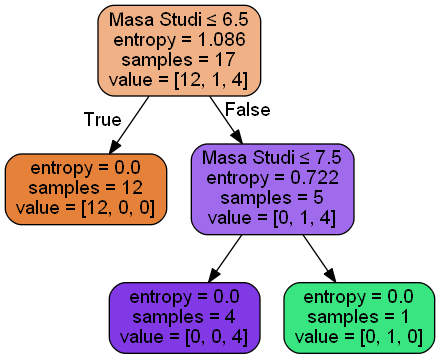

In [31]:
Image(filename='Graph_tree.png')

# Uji confusion Matrix

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predict")
plt.ylabel("actual")
plt.show()

<Figure size 500x300 with 2 Axes>

In [33]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

       cepat       1.00      1.00      1.00        10
      sedang       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [34]:
accuracy_score(y_test,predict)

1.0